<h1 style="text-align: center;">[Daegu Apartement Predict Price]</h1>
<h3 style="text-align: center;">[Rachmawati Hapsari Putri]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**<br>

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**1.2 Problem Statements**

**How to predict apartment sale prices to guide property investments and optimize real estate development strategies?**  


**1.3 Goals**

To develop a model that predicts apartment sale prices by analyzing key factors such as size, year built, number of facilities, and nearby amenities. These predictions will help sellers set competitive and accurate prices, highlight valuable property features to attract buyers, and reduce the time properties stay on the market, ensuring maximum profit through informed, data-driven decisions.

**1.4 Analytical Approach**

To address the problem, we will analyze the data to uncover patterns in the features that distinguish one apartment from another. By identifying the relationships between these features and the apartment prices, we aim to gain valuable insights into the key drivers of pricing.

Next, we will build a regression model to predict apartment prices. This predictive tool will assist sellers in setting competitive and market-aligned prices for their properties. It will also enable better decision-making by providing a clear understanding of the factors influencing apartment prices, ensuring sellers maximize revenue while attracting buyers.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**Business Metric**

- **Property Sale Revenue**:<br>
    Measures the total revenue generated from the sale of properties, which is the primary goal of the model. Accurate predictions of property prices directly contribute to maximizing revenue for sellers.


**Machine Learning Evaluation Metrics**

- **Mean Absolute Error (MAE)**:  
  MAE calculates the average of the absolute differences between the predicted and actual prices. It helps to understand the typical error size in predicting property prices. A lower MAE means the model's predictions are closer to the actual prices.

- **Root Mean Squared Error (RMSE)**:  
  RMSE gives more weight to larger errors than MAE, making it useful for identifying cases where the model's predictions are far off. It provides an overall measure of how spread out or varied the errors are. A smaller RMSE suggests more accurate predictions.

- **Mean Absolute Percentage Error (MAPE)**:  
  MAPE measures the average percentage difference between the predicted and actual prices. This is helpful for understanding the error relative to the actual price, and it makes it easier to compare accuracy across different price ranges. A lower MAPE indicates better prediction accuracy, especially for relative price accuracy.

- **R² (R-squared, Coefficient of Determination)**:  
  R² shows how well the model’s features (such as apartment size, location, and amenities) explain the variation in the target variable (property sale price). A higher R² means the model does a good job of capturing the factors that affect the sale price, making its predictions more reliable.

**1.6 Success Criteria**

- Achieve MAE and RMSE values that are sufficiently low compared to the average apartment price range.
- Obtain a MAPE of less than 5-10% to ensure consistent relative accuracy across varying price levels.
- Obtain an R² value of at least 0.8, meaning the model explains 80% or more of the variance in apartment prices.

## **Section 2. Data Understanding**

**2.1 General Information**

| Name | Description |
| ------------------ |------------------- |
Hallway Type| Apartment type
TimeToSubway| Time needed to the nearest subway station
SubwayStation| The name of the nearest subway station
N_FacilitiesNearBy(ETC)| The number of facilities nearby
N_FacilitiesNearBy(PublicOffice)| The number of public office facilities nearby
N_SchoolNearBy(University)| The number of universities nearby
N_Parkinglot(Basement)| The number of the parking lot
YearBuilt| The year the apartment was built
N_FacilitiesInApt| Number of facilities in the apartment
Size(sqft)| The apartment size (in square feet)
SalePrice| The apartment price (Won)

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
Hallway Type| Different apartment types often appeal to different buyers based on lifestyle, family size, or cultural preferences
TimeToSubway| Proximity to public transportation is a critical factor influencing convenience, demand, and value.
SubwayStation| The reputation and connectivity of a subway station (e.g., central, busy, or well-connected stations) can affect apartment desirability.
N_FacilitiesNearBy(ETC)| The availability of general facilities such as shops, restaurants, or parks enhances livability and demand.
N_FacilitiesNearBy(PublicOffice)| Proximity to government or administrative facilities improves convenience for residents who frequently access these services.
N_SchoolNearBy(University)| Proximity to universities increases demand from students, faculty, and investors looking for rental income
N_Parkinglot(Basement)| Adequate parking facilities significantly impact the convenience for car owners, particularly in urban areas where parking is limited.
YearBuilt| Newer apartments often have modern features and infrastructure, while older ones may need renovations, impacting desirability and pricing.
N_FacilitiesInApt| Facilities within the apartment complex (e.g., gyms, pools, security) increase convenience, lifestyle value, and overall attractiveness.
Size(sqft)| Apartment size is a fundamental factor influencing price. Larger apartments typically command higher values.

### Importing libraries & packages

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from category_encoders import BinaryEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold

**Import Dataset**

In [293]:
df = pd.read_csv('data_daegu_apartment.csv')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**2.3 Statistics Summary**

In [295]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [296]:
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [297]:
pd.set_option('display.max_colwidth', None)
data = []
for col in df.columns:
    data.append([col, df[col].nunique(), df[col].unique()])

dgu = pd.DataFrame(data, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [298]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

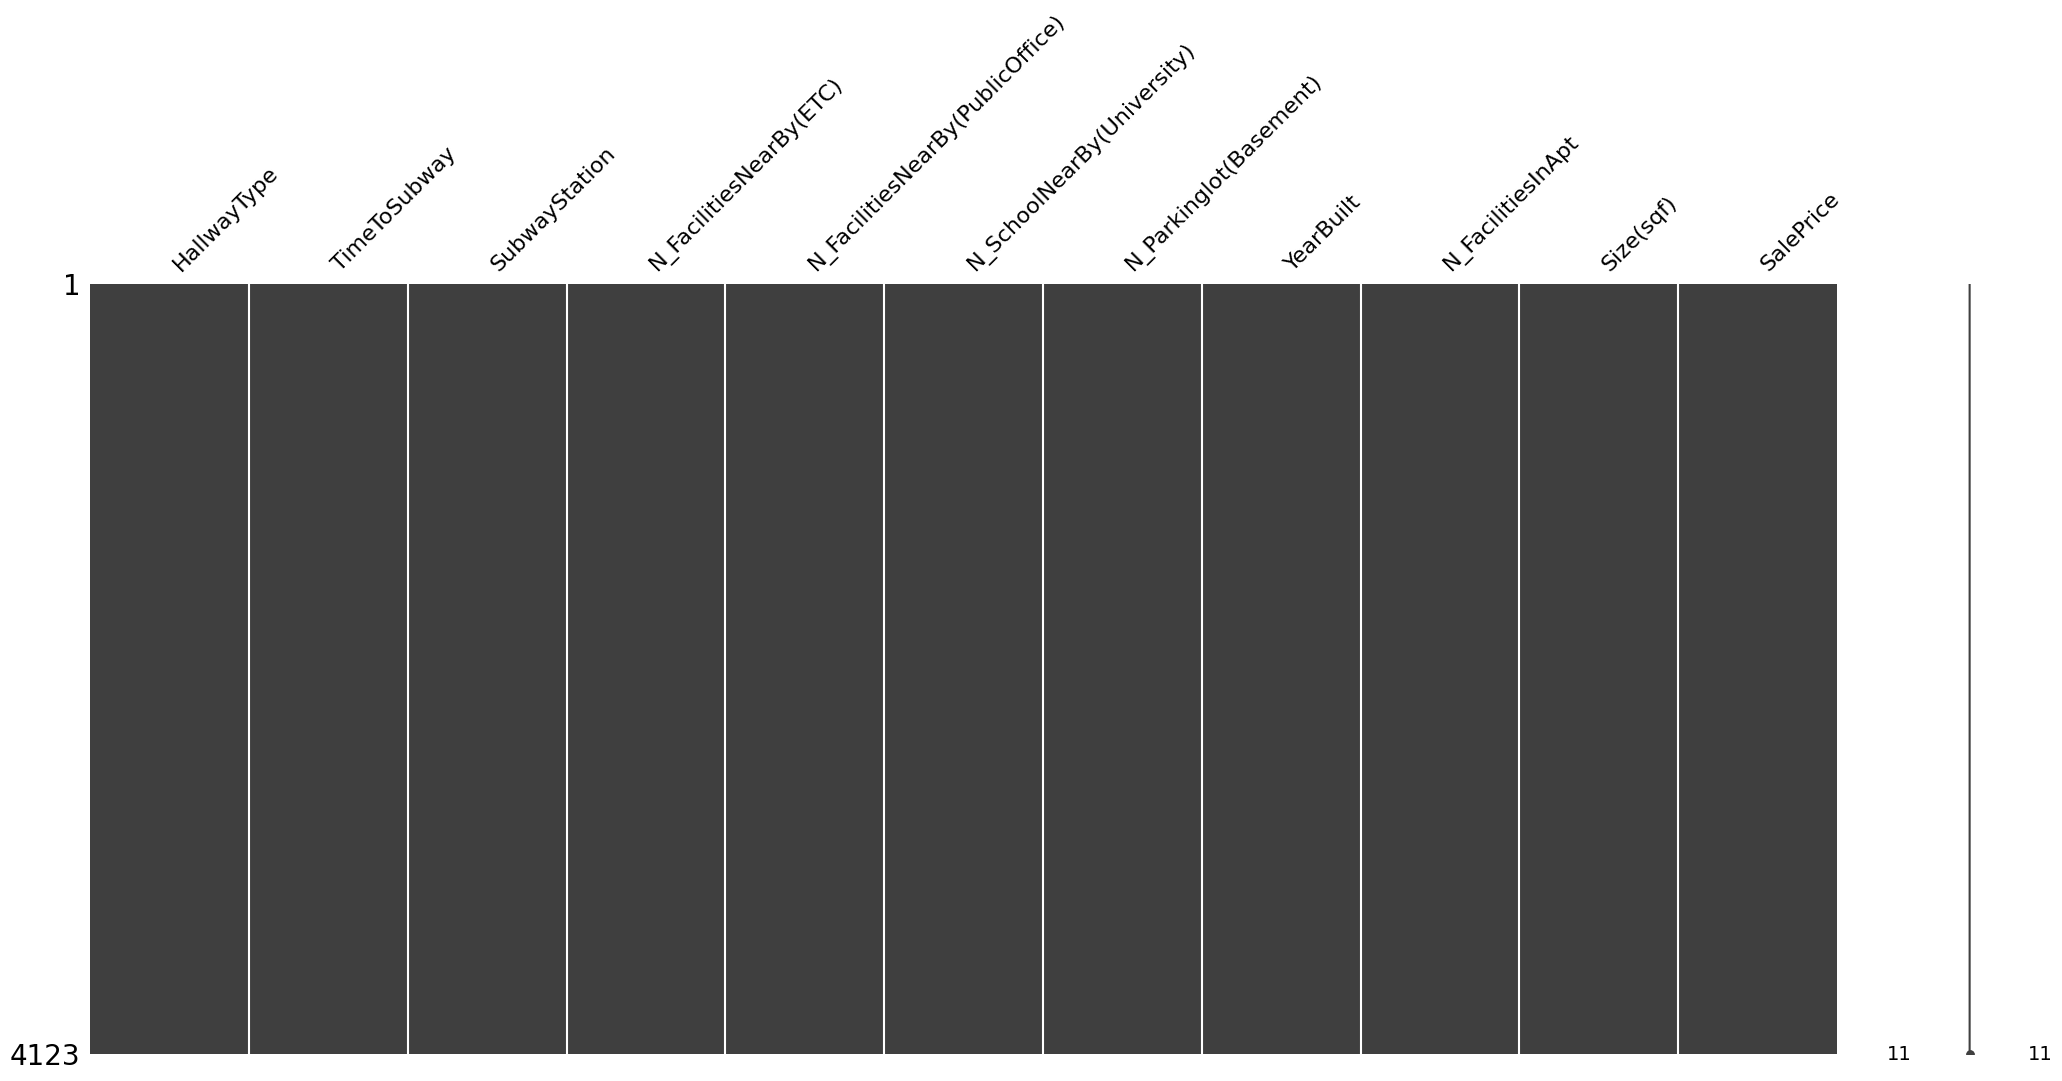

In [299]:
import missingno
missingno.matrix(df)

In [300]:
print(f'{(df.isnull().sum() / len(df)) * 100}')

HallwayType                         0.0
TimeToSubway                        0.0
SubwayStation                       0.0
N_FacilitiesNearBy(ETC)             0.0
N_FacilitiesNearBy(PublicOffice)    0.0
N_SchoolNearBy(University)          0.0
N_Parkinglot(Basement)              0.0
YearBuilt                           0.0
N_FacilitiesInApt                   0.0
Size(sqf)                           0.0
SalePrice                           0.0
dtype: float64


There is no Missing Values in this dataset

**3.2 Duplicated Values**

In [301]:
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Unexpectedly, there is 1422 row of data duplicate in this dataset

In [302]:
df[(df['Size(sqf)'] == 910) & (df['SalePrice'] == 263345)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
18,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
790,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1396,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1970,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
2286,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345


To make sure the data duplicate, i try to see the size and price of one data, and turns out there is 6 duplicate of this data, so we need to remove it because the machine learning model is senistive with duplicate data. 

In [303]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [304]:
df.shape

(2701, 11)

In [305]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2698,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


**3.3 Identify Spelling Errors**

In [306]:
categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total Category on '{col}': {df[col].nunique()}")

Total Category on 'HallwayType': 3
Total Category on 'TimeToSubway': 5
Total Category on 'SubwayStation': 8


In [307]:
for column in categoric_features.columns:
    print(f"Unique values in {column}:")
    print(categoric_features[column].unique())
    print("-" * 50)


Unique values in HallwayType:
['terraced' 'mixed' 'corridor']
--------------------------------------------------
Unique values in TimeToSubway:
['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
--------------------------------------------------
Unique values in SubwayStation:
['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']
--------------------------------------------------


No Spelling error in this dataset

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
numeric_features = df.select_dtypes(include='number')

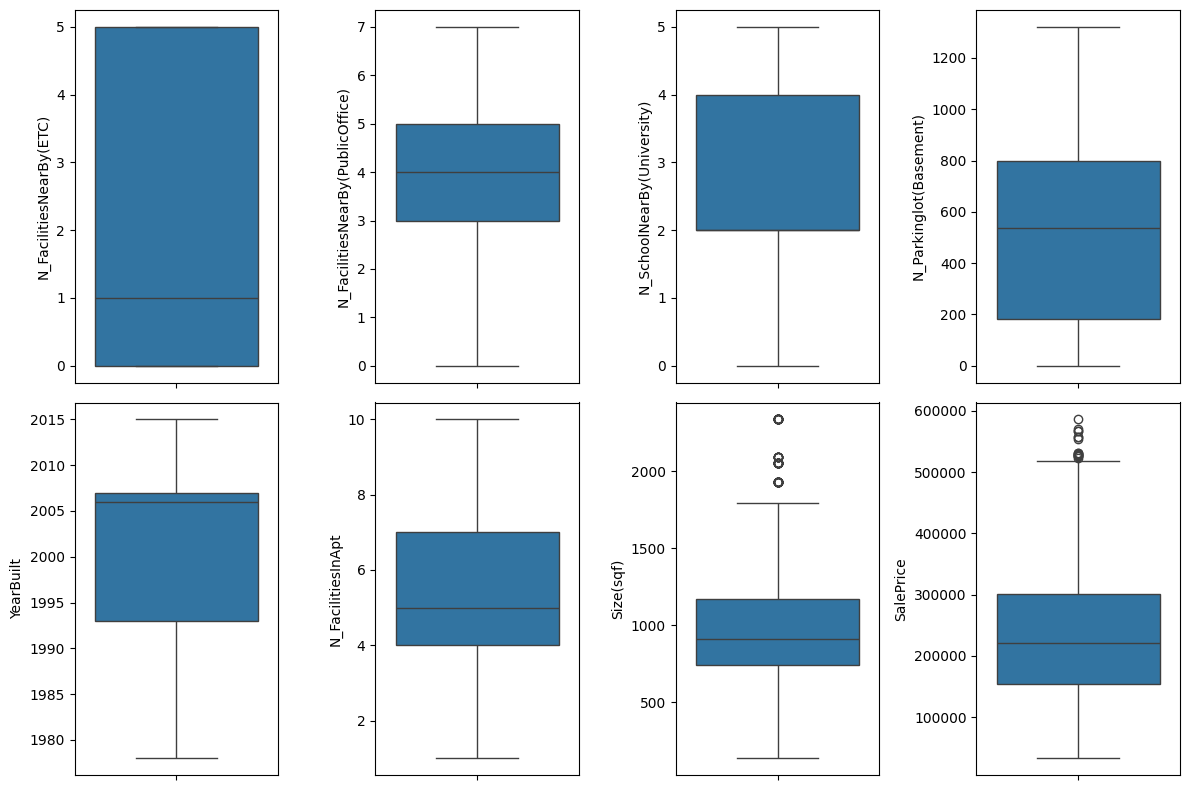

In [310]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

There is no anomaly in the categoric feature, but there is outlier in Size and Price Column

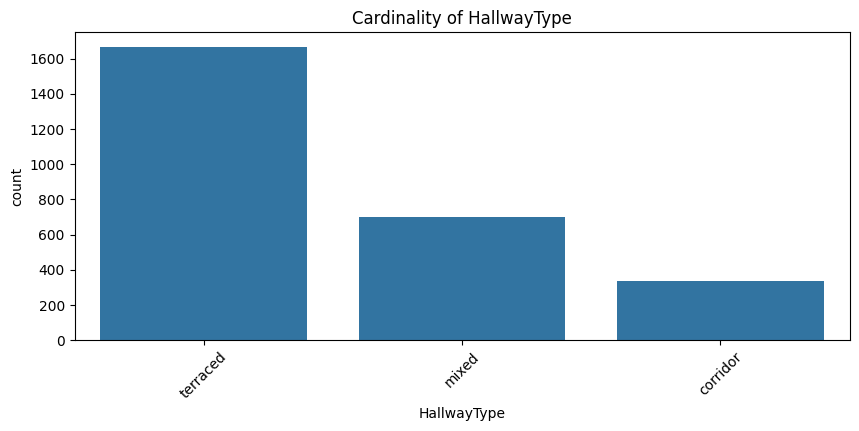

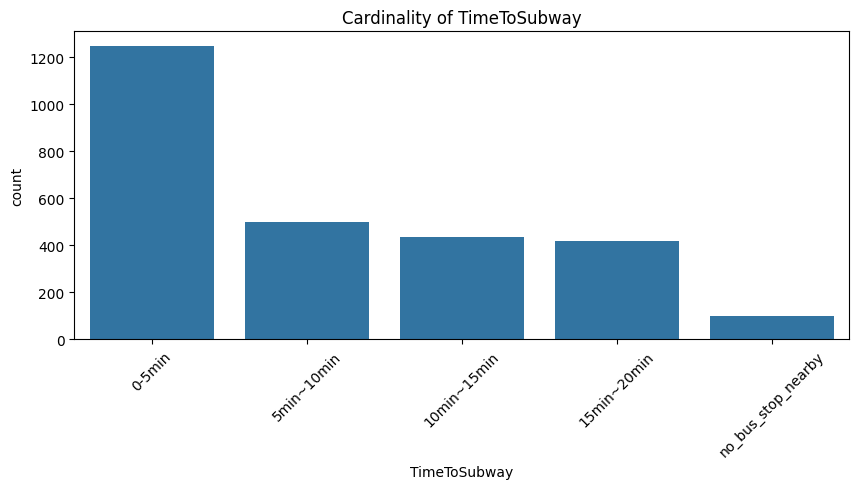

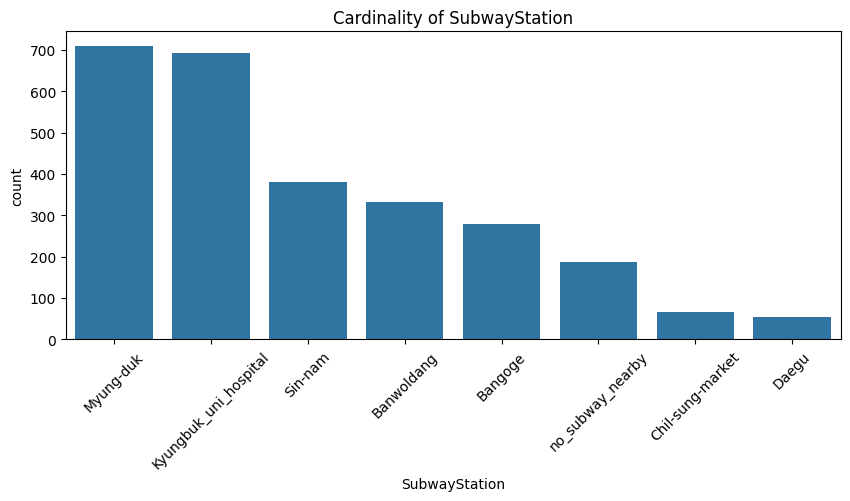

In [311]:
for col in categoric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Cardinality of {col}")
    plt.xticks(rotation=45)
    plt.show()

For categoric features, there is no anomaly data.

**3.5 Identify Outlier Values**

In [312]:
def find_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower: {lower_limit}')
    print(f'upper: {upper_limit}') 
    
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(data)) * 100

    print(f'Number of outliers: {num_outliers}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

In [313]:
find_outlier(df['SalePrice'])

IQR: 147345.0
lower: -67478.5
upper: 521901.5
Number of outliers: 17
Percentage of outliers: 0.63%


In [314]:
find_outlier(df['Size(sqf)'])

IQR: 424.0
lower: 107.0
upper: 1803.0
Number of outliers: 84
Percentage of outliers: 3.11%


In [315]:
df.drop(df[df['SalePrice'] > 521901.5].index, inplace=True)

In [316]:
df.drop(df[df['Size(sqf)'] > 1803.0].index, inplace=True)

In [317]:
(df['SalePrice'] > 521901.5).sum()

np.int64(0)

In [318]:
df[df['Size(sqf)'] > 1803.0].count()['Size(sqf)']

np.int64(0)

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [321]:
train, test = train_test_split(df_seen, test_size=0.2, random_state=42)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Check Distribution**

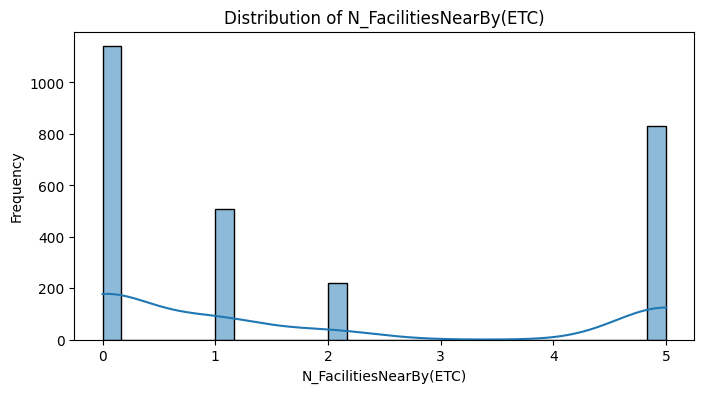

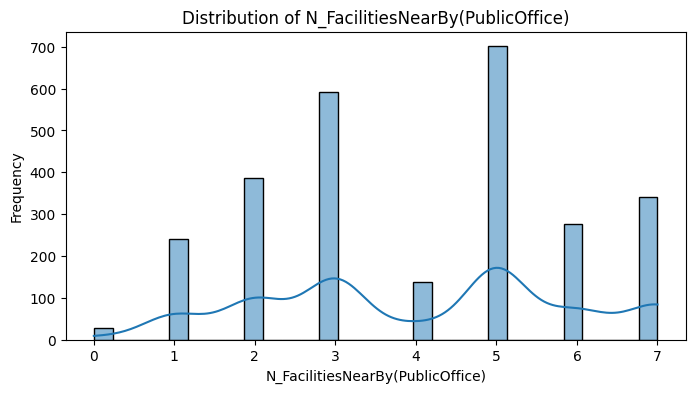

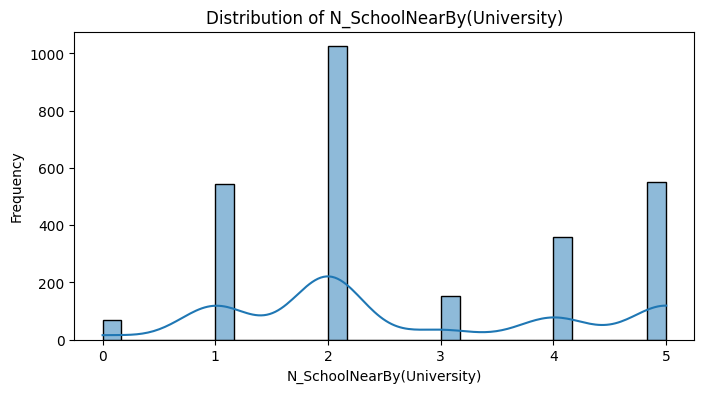

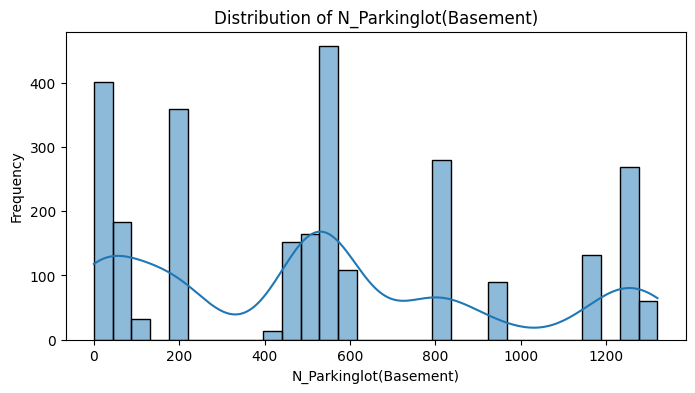

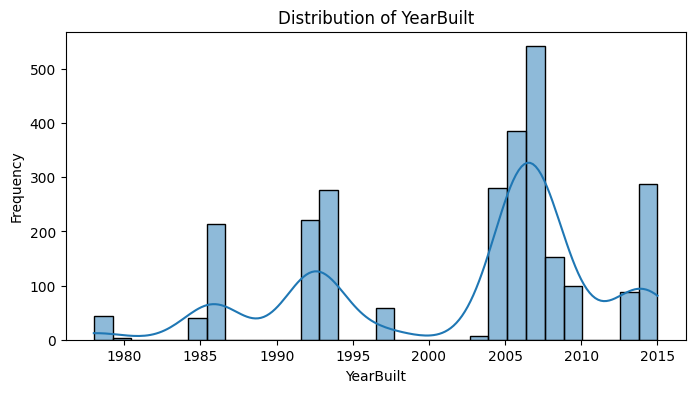

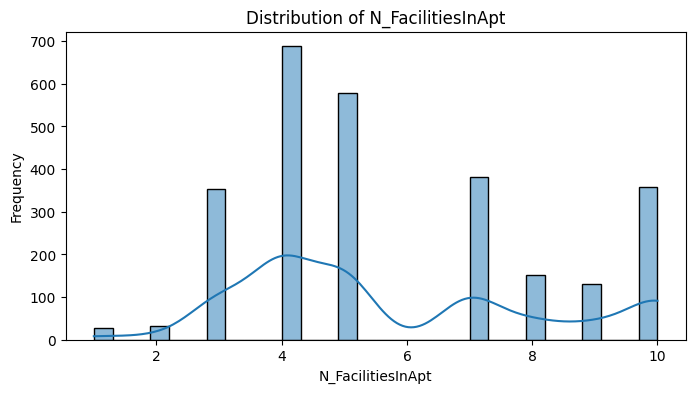

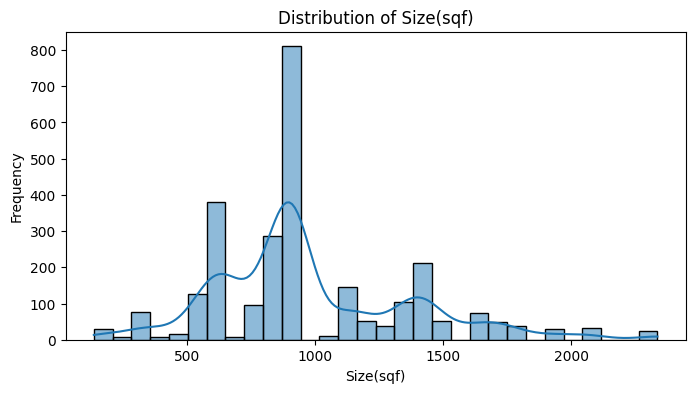

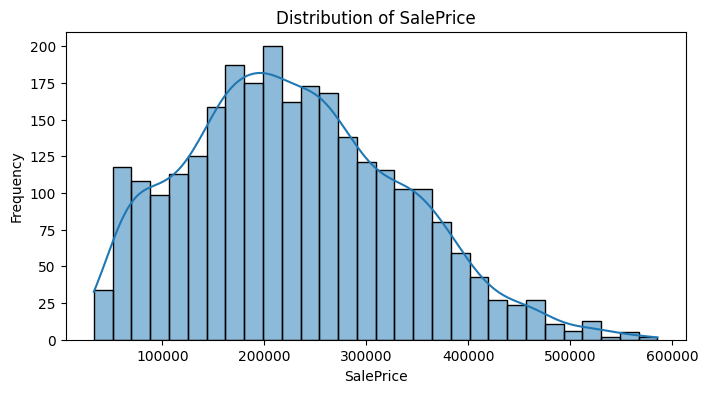

In [322]:
for column in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_features[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [323]:
print(f"Total Apartement in Nearest Subway Station:\n{df['SubwayStation'].value_counts()}")
print(f"\nType of Hallway Apartment:\n{df['HallwayType'].value_counts()}")

Total Apartement in Nearest Subway Station:
SubwayStation
Myung-duk                685
Kyungbuk_uni_hospital    649
Sin-nam                  357
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

Type of Hallway Apartment:
HallwayType
terraced    1601
mixed        674
corridor     336
Name: count, dtype: int64


In [324]:
subway_type = (df.groupby(['SubwayStation', 'HallwayType'])['HallwayType']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
subway_time = (
    df.groupby(['SubwayStation', 'TimeToSubway'])['TimeToSubway']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

In [325]:
subway_time

,SubwayStation,TimeToSubway,Count
5,Kyungbuk_uni_hospital,0-5min,367
9,Myung-duk,15min~20min,329
10,Sin-nam,0-5min,310
1,Banwoldang,0-5min,301
6,Kyungbuk_uni_hospital,10min~15min,282
0,Bangoge,5min~10min,280
7,Myung-duk,0-5min,212
8,Myung-duk,10min~15min,144
13,no_subway_nearby,no_bus_stop_nearby,100
12,no_subway_nearby,5min~10min,88


In [326]:
subway_type

,SubwayStation,HallwayType,Count
7,Kyungbuk_uni_hospital,terraced,605
9,Myung-duk,mixed,329
12,Sin-nam,terraced,310
2,Banwoldang,terraced,301
0,Bangoge,mixed,280
10,Myung-duk,terraced,212
14,no_subway_nearby,terraced,160
8,Myung-duk,corridor,144
3,Chil-sung-market,mixed,65
11,Sin-nam,corridor,47


In [327]:
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,295575.0
Kyungbuk_uni_hospital,245132.0
Sin-nam,242477.0
no_subway_nearby,236725.5
Bangoge,179867.0


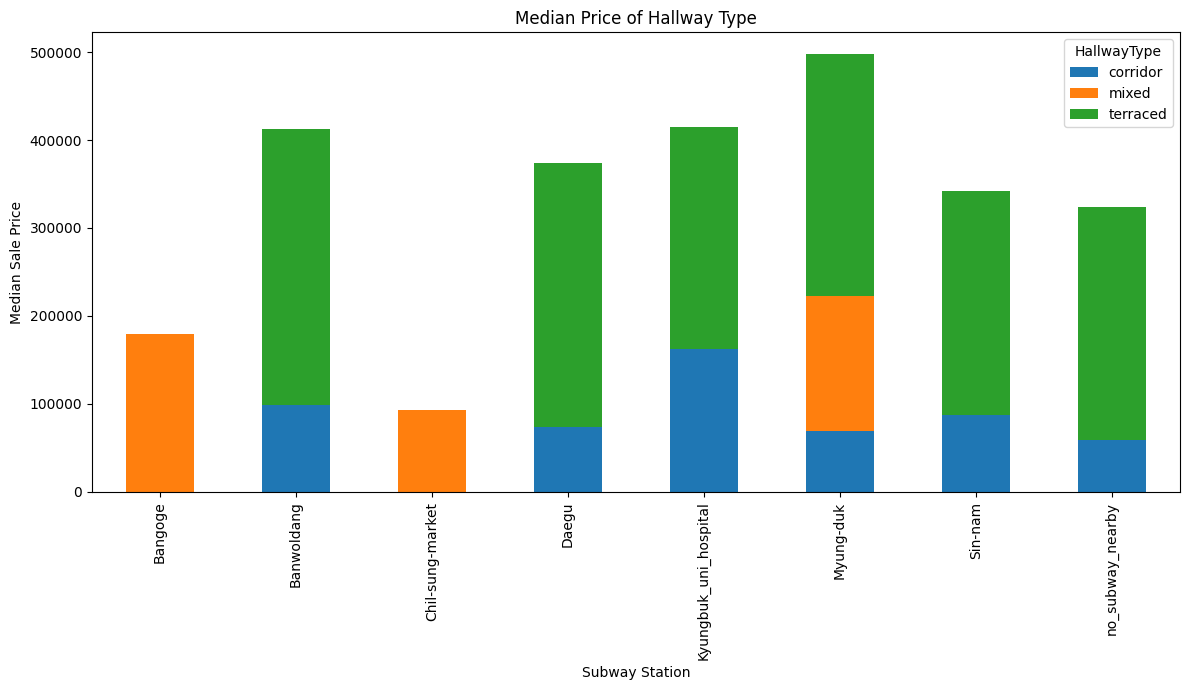

In [328]:
import matplotlib.pyplot as plt

# Create a pivot table
subway_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

# Plot the pivot table as a stacked bar chart
pivot_plot = subway_pivot.plot.bar(stacked=True, figsize=(12, 7))

# Customize the plot
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Sale Price')
pivot_plot.set_title('Median Price of Hallway Type')

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Text(0.5, 1.0, 'Hallway Type per Nearest Subway Station')

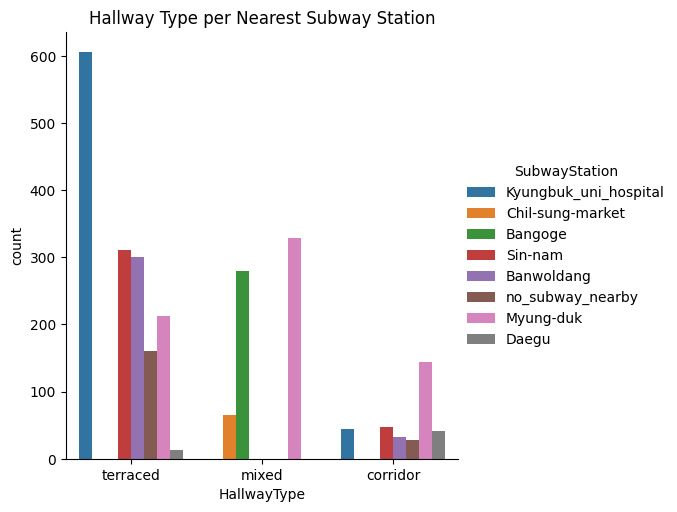

In [329]:
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df) 
plt.title('Hallway Type per Nearest Subway Station')

**5.2 Correlation Analysis**

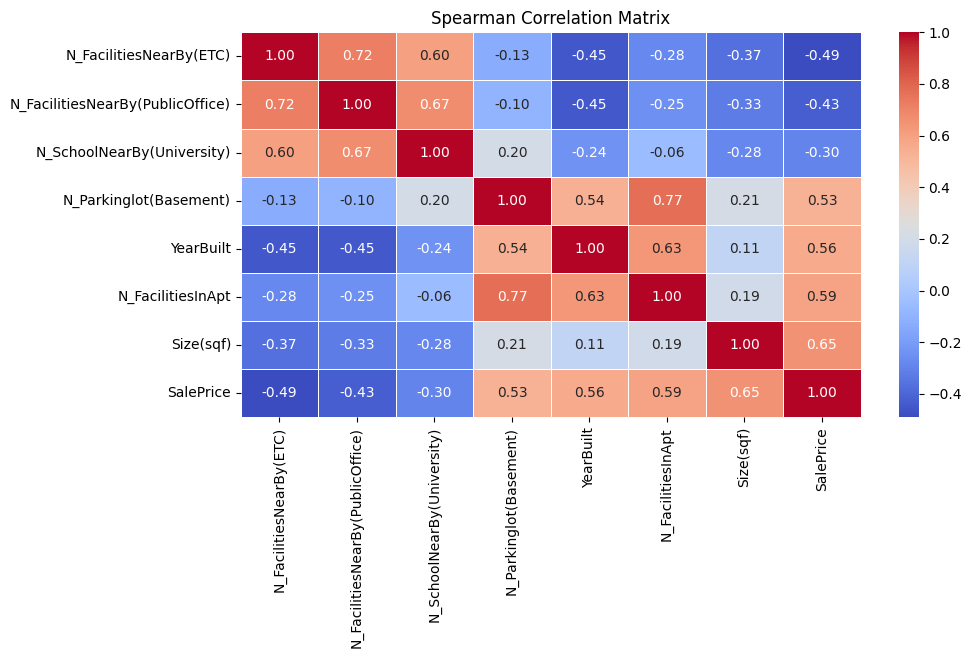

In [330]:
correlation_matrix = numeric_features.corr(method='spearman')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

- Strong Positive Correlations:<br>
    SalePrice shows a strong positive correlation with:<br>
    - Size(sqf) (0.65): Larger apartments are associated with higher sale prices.
    - N_FacilitiesInApt (0.59): More facilities in an apartment complex increase its value.
    - YearBuilt (0.56): Newer buildings tend to have higher sale prices.
    - N_Parkinglot(Basement) and N_FacilitiesInApt (0.77): Apartments with basement parking lots tend to have more facilities.

- Negative Correlations:<br>
    SalePrice negatively correlates with:
    - N_FacilitiesNearBy(ETC) (-0.49): Apartments with many nearby facilities of type "ETC" tend to have lower sale prices.
    - N_FacilitiesNearBy(PublicOffice) (-0.43): The proximity to public offices seems to negatively influence prices.
    - YearBuilt and N_FacilitiesNearBy(ETC) (-0.45): Older apartments tend to be in areas with more general nearby facilities.

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

In [331]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [332]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
# Data Testing
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

print(X_train.shape)
print(y_train.shape)

(1670, 10)
(1670,)


**6.2 Data Transformation (Feature Engineering)**

In [333]:
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [334]:
base_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'Size(sqf)',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [335]:
bin_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('Binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), ['Size(sqf)']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [336]:
base_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'Size(sqf)',
                                  'N_Parkinglot(Basement)', 'YearBuilt'])],
                  verbose_feature_names_out=False)

In [337]:
bin_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('Binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['Size(sqf)']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'N_Parkinglot(Basement)',
                                  'YearBuilt'])],
                  verbose_feature_names_out=False)

**6.3 Overview**

## **Section 7. Model Development**

In [338]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)

base_model = [lr,knn,dt,rf,xgb,ada]

In [339]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

target_model = [log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]

In [340]:
base_reg = Pipeline(steps=[
    ('FeatureEngineering', base_transformer),
    ('Modeling', None)
])

bin_reg = Pipeline(steps=[
    ('FeatureEngineering', bin_transformer),
    ('Modeling', None)
])

In [341]:
list_model =[lr,knn,dt,rf,xgb,ada,log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]
list_transformer = [base_transformer, bin_transformer]
list_pipeline = [base_reg, bin_reg]

In [342]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold

# Define lists to store the results for each metric
score_rmse, score_mae, score_mape, score_r2 = [], [], [], []
mean_rmse, mean_mae, mean_mape, mean_r2 = [], [], [], []
std_rmse, std_mae, std_mape, std_r2 = [], [], [], []
best_estimators = []  # To track the best estimators (pipelines)

# Cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# List of custom labels for pipelines
pipeline_labels = ['Base Pipeline', 'Binary Pipeline']

# Model and label mapping
list_model = [lr, knn, dt, rf, xgb, ada, log_lr, log_knn, log_dt, log_rf, log_xgb, log_ada]
model_labels = [
    'Linear Regressor', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor',
    'XGBoost Regressor', 'AdaBoost Regressor', 'Log-Transformed Linear Regressor',
    'Log-Transformed KNN Regressor', 'Log-Transformed Decision Tree Regressor',
    'Log-Transformed Random Forest Regressor', 'Log-Transformed XGBoost Regressor',
    'Log-Transformed AdaBoost Regressor'
]

list_pipeline = [base_reg, bin_reg]

# Loop through each combination of model and pipeline
for pipeline, pipeline_label in zip(list_pipeline, pipeline_labels):
    for model, model_label in zip(list_model, model_labels):
        # Update the pipeline with the current model
        pipeline.set_params(Modeling=model)
        
        # RMSE (Negative because cross_val_score minimizes the score)
        model_rmse = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error')
        score_rmse.append(model_rmse)
        mean_rmse.append(np.mean(model_rmse))
        std_rmse.append(np.std(model_rmse))

        # MAE
        model_mae = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
        score_mae.append(model_mae)
        mean_mae.append(np.mean(model_mae))
        std_mae.append(np.std(model_mae))

        # MAPE
        model_mape = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
        score_mape.append(model_mape)
        mean_mape.append(np.mean(model_mape))
        std_mape.append(np.std(model_mape))

        # R2
        model_r2 = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='r2')
        score_r2.append(model_r2)
        mean_r2.append(np.mean(model_r2))
        std_r2.append(np.std(model_r2))

        # Append the pipeline to the list of best estimators (pipelines)
        best_estimators.append(pipeline)

# Store results in a DataFrame with custom labels
results_df = pd.DataFrame({
    'Model': [model_label for model_label in model_labels for _ in list_pipeline],
    'Pipeline': [pipeline_label for _ in model_labels for pipeline_label in pipeline_labels],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_R2': mean_r2,
    'Std_R2': std_r2
})

# Sort the results based on Mean R² score (or any other metric)
results_df_sorted = results_df.sort_values(by='Mean_R2', ascending=False)

# Display the sorted results
display(results_df_sorted)

,Model,Pipeline,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
10,AdaBoost Regressor,Base Pipeline,-45526.460256,2264.396422,-36140.977166,1775.793433,-0.185698,0.008511,0.794400,0.010416
4,Decision Tree Regressor,Base Pipeline,-45544.566350,1856.338884,-36499.017948,1565.523623,-0.192830,0.009029,0.794160,0.008376
9,XGBoost Regressor,Binary Pipeline,-45556.332147,2141.207755,-36147.878872,1696.248591,-0.185473,0.006510,0.794089,0.010143
2,KNN Regressor,Base Pipeline,-45611.963659,2085.983537,-36527.735941,1706.654135,-0.192387,0.010761,0.793655,0.008096
8,XGBoost Regressor,Base Pipeline,-45679.756424,2489.445882,-36175.808762,1918.833508,-0.185893,0.010499,0.793069,0.011399
3,KNN Regressor,Binary Pipeline,-45702.090853,1639.920223,-36558.108676,1443.280752,-0.193389,0.007372,0.792626,0.009138
20,Log-Transformed XGBoost Regressor,Base Pipeline,-46278.292116,2272.647455,-36324.437257,1713.937786,-0.186157,0.005936,0.787453,0.012362
22,Log-Transformed AdaBoost Regressor,Base Pipeline,-46299.313934,2237.909734,-36358.487168,1659.824824,-0.186678,0.005327,0.787240,0.012432
21,Log-Transformed XGBoost Regressor,Binary Pipeline,-46399.957903,2259.940134,-36414.098094,1662.642900,-0.186987,0.005242,0.786342,0.012139
16,Log-Transformed Decision Tree Regressor,Base Pipeline,-46425.844024,1582.918498,-36928.783638,1309.197505,-0.195449,0.004031,0.785832,0.012360


In [343]:
# Identify the best estimator based on Mean R² score
best_base_index = results_df_sorted.index[0]  # Get the index of the best row (highest Mean_R2)
best_base_model = results_df_sorted.loc[best_base_index, 'Model']  # Extract the best model
best_base_score = results_df_sorted.loc[best_base_index, 'Mean_R2']  # Extract the best R² score

print(f"Best Model: {best_base_model}")
print(f"Best Mean R² Score: {best_base_score}")

Best Model: AdaBoost Regressor
Best Mean R² Score: 0.7944004774093628


In [344]:
# Now, we can safely access the best pipeline (estimator) by index
best_base_estimator = best_estimators[best_base_index]
best_base_estimator

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt'])],
                                   verbose_feature_names_out=False)),
                ('Modeling',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=AdaBoostRegressor(random_state=1)))])

In [348]:
print(f"Best Estimator (Pipeline): {best_base_estimator}")

Best Estimator (Pipeline): Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                     

In [361]:
# Step 1: Train the best pipeline on the full training data
best_base_estimator.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = best_base_estimator.predict(X_test)

# Step 3: Evaluate the predictions (optional)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Calculate RMSE, MAE, MAPE, R² for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")

RMSE: 58356.33904914222
MAE: 47506.868114656325
MAPE: 0.22569990697773656
R²: 0.6888606820159081


In [359]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import numpy as np

# Define the hyperparameter grid for tuning AdaBoost
hyperparam_adaboost = {
    "modeling__regressor__n_estimators": list(np.arange(50, 201, 10)),  # Number of boosting stages
    "modeling__regressor__learning_rate": [0.01, 0.1, 0.5, 1],  # Learning rate options
}

# Define the pipeline with the base transformer and AdaBoostRegressor
base_pipe = Pipeline([
    ("FeatureEngineering", base_transformer),  # Removed extra quotes
    ("modeling", log_ada)
])

# Setup GridSearchCV for hyperparameter tuning
base_tune = GridSearchCV(
    base_pipe,  # Your pipeline that includes the AdaBoostRegressor
    param_grid=hyperparam_adaboost,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
    refit='r2',  # Refit the best model using the R² score
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Cross-validation with KFold
    verbose=1  # Set verbosity to 1 to see progress
)

base_tune.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoding',
                                                                         OneHotEncoder(),
                                                                         ['HallwayType',
                                                                          'TimeToSubway',
                                                                          'SubwayStation']),
                                                                        ('RobustScaling',
                                                                         RobustScaler(),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_FacilitiesNearBy(PublicOffice)',
                                                                          'N_Scho...
                         'modeling__regressor__n_estimators': [np.int64(50),
                                                               np.int64(60),
                                                               np.int64(70),
                                                               np.int64(80),
                                                               np.int64(90),
                                                               np.int64(100),
                                                               np.int64(110),
                                                               np.int64(120),
                                                               np.int64(130),
                                                               np.int64(140),
                                                               np.int64(150),
                                                               np.int64(160),
                                                               np.int64(170),
                                                               np.int64(180),
                                                               np.int64(190),
                                                               np.int64(200)]},
             refit='r2',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [360]:
# Show the best parameters and best score
print(f"Best parameters: {base_tune.best_params_}")
print(f"Best cross-validation score: {base_tune.best_score_}")

# Get the best estimator (pipeline)
best_base_tune_estimator = base_tune.best_estimator_
best_base_tune_estimator

Best parameters: {'modeling__regressor__learning_rate': 0.1, 'modeling__regressor__n_estimators': np.int64(100)}
Best cross-validation score: 0.7187126335158891


Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt'])],
                                   verbose_feature_names_out=False)),
                ('modeling',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=AdaBoostRegressor(learning_rate=0.1,
                                                                        n_estimators=np.int64(100),
                                                                        random_state=1)))])

In [ ]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-52346.45149111 -49538.19322107 -53605.33001162 -52566.21799418
 -52745.47510071] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41060.79717569 -39705.8587111  -40901.39324437 -41805.59120944
 -41923.45895161] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.21077557 -0.20668332 -0.22018475 -0.20631234 -0.21348298] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-50921.169571   -49730.04828809 -54271.74522581 -50932.32477503
 -49847.57512665] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-41137.70201696 -39772.90144255 -40941.05719975 -39984.19902645
 -39313.30728731] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [70]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-52160.333564,1378.797112,-41079.419858,794.787686,-0.211488,0.005099
1,KNN Regressor,-51140.572597,1646.643140,-40229.833395,698.456569,-0.208502,0.010751
2,DecisionTree Regressor,-46278.292116,2272.647455,-36324.437257,1713.937786,-0.186157,0.005936
3,RandomForest Regressor,-46399.957903,2259.940134,-36414.098094,1662.642900,-0.186987,0.005242
4,XGBoost Regressor,-46299.313934,2237.909734,-36358.487168,1659.824824,-0.186678,0.005327


In [ ]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,47473.093487,38895.703583,0.204175
RandomForest,47545.169217,39015.589422,0.204506


In [72]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [73]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoding',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation']),
                                                                              ('Binning',
                                                                               KBinsDiscretizer(encode='ordinal',
                                                                                                strategy='uniform'),
                                                                               ['Size(sqf)']),
                                                                              ('RobustScaling',
                                                                               Robu...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
22,0.250373,0.034354,0.024708,0.008582,0.7,0.002783,155,4,0.25,8,...,1385.357225,2,-0.200931,-0.199809,-0.185234,-0.196300,-0.191469,-0.194749,0.005788,9
15,0.208287,0.018944,0.025214,0.005877,0.7,0.021544,102,9,0.70,5,...,1448.567011,1,-0.202966,-0.197369,-0.182909,-0.194418,-0.190675,-0.193667,0.006715,1
23,0.231881,0.018657,0.021801,0.004180,0.9,3.593814,153,4,0.33,9,...,1439.986018,5,-0.202544,-0.198000,-0.184499,-0.196031,-0.192134,-0.194642,0.006080,7
13,0.297152,0.027231,0.025156,0.006808,0.6,0.059948,171,9,0.18,4,...,1383.308504,8,-0.200820,-0.198367,-0.184673,-0.196097,-0.191209,-0.194233,0.005736,4
17,0.330781,0.033045,0.022651,0.003196,0.6,0.001000,190,5,0.04,9,...,1297.285117,9,-0.201396,-0.198333,-0.187527,-0.196697,-0.190418,-0.194874,0.005131,11


In [76]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -46028.3645584351
Best_params: {'model__subsample': np.float64(0.7), 'model__reg_alpha': np.float64(0.0027825594022071257), 'model__n_estimators': np.int64(155), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.25), 'model__gamma': np.int64(8), 'model__colsample_bytree': np.float64(0.3)}


In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,47197.068175,38950.844619,0.20518


In [78]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,47473.093487,38895.703583,0.204175


In [79]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,47197.068175,38950.844619,0.20518


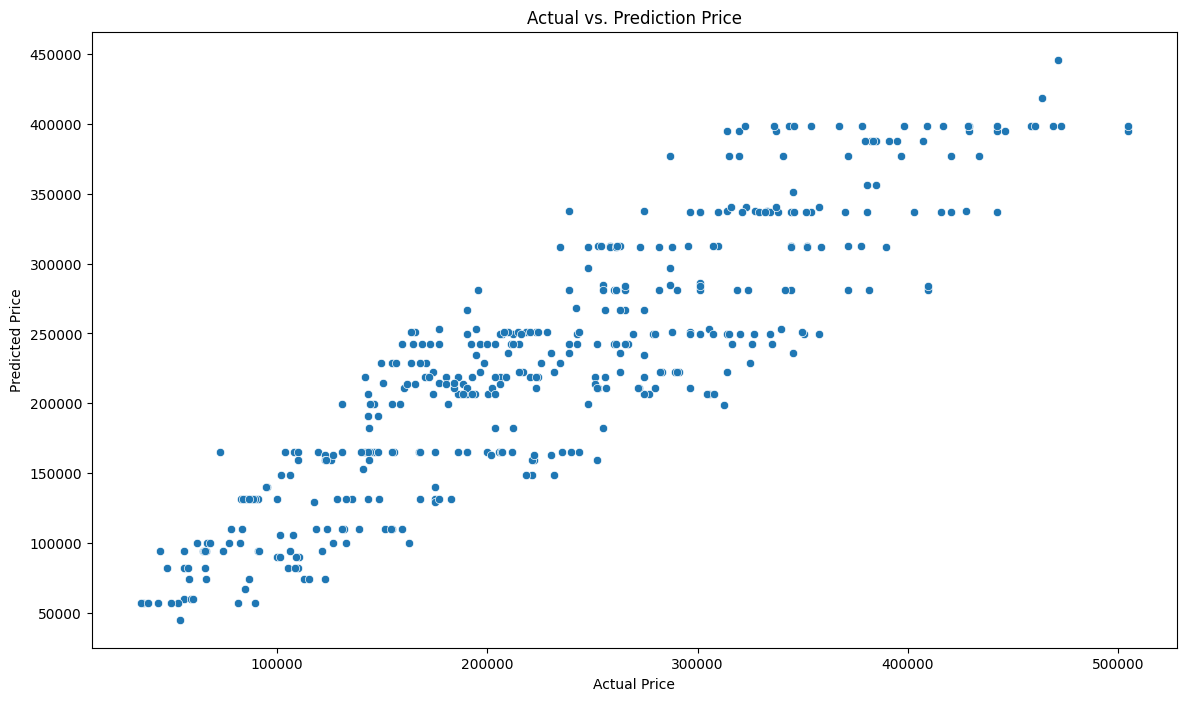

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

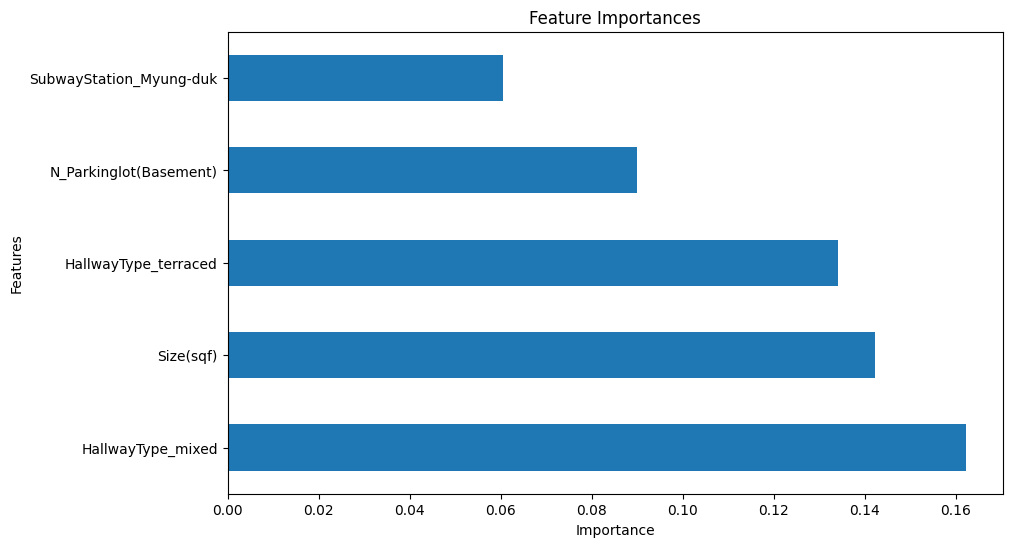

In [ ]:
# Extract feature names after transformation
feature_names = transformer.get_feature_names_out()

# Extract feature importances from the model
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, index=feature_names)

# Sort and select top features
top_features = feature_imp.sort_values(ascending=False).head()

# Plot feature importances
top_features.plot(kind='barh', title='Feature Importances', figsize=(10, 6))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

**7.2 Developing the Model Pipeline**

**7.3 Model Benchmarking (Comparing model base performance)**

**7.4 Tune Model**

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)